# Linear Regression introduction


---


# Objectifs
Pour ce TP nous allons apprendre à écrire notre premier modèle : une régression
linéaire. Nous allons l’expérimenter sur un problème jouet afin de suivre pas à pas
la construction et l’évaluation de notre modèle.<br/>
Dans le cas d’une régression linéraire on suppose qu’il existe une relation linéaire
entre les données d’entrées et les valeurs à prédire.<br/>
Ce tp est insipré des travaux de Gavin Hackeling dans le livre Mastering machine
learning with scikit-learn.<br/>
Il s’agit de prédire la relation entre le prix d’une pizza et sa taille. Comme spécifié
précédemment, et comme nous avons choisi une régression linéaire, celà signifie que
nous faisons l’hypothèse qu’il existe une relation linaire entre le prix d’une pizza et sa
taille.

# Import des librairies

In [83]:
# La bibliothèque NumPy fournit un support pour les tableaux et matrices multidimensionnels ainsi que des fonctions mathématiques pour les manipuler. 
import numpy as np

# La bibliothèque Matplotlib fournit une gamme d'outils de tracé pour la visualisation des données. 
import matplotlib.pyplot as plt

# Le module sklearn.linear_model fournit des outils pour la régression linéaire.
from sklearn.linear_model import LinearRegression


# Insertion des donnees

In [64]:
X = np.array([[6], [8], [10], [14], [18]])
y = [7, 9, 13, 17.5, 18]


X est un tableau NumPy qui contient un vecteur de colonne avec 5 lignes et 1 colonne. Les valeurs de X sont [6, 8, 10, 14, 18]. C'est souvent utilisé pour représenter la variable indépendante dans un modèle de régression linéaire.<br/>

y est une liste Python qui contient les valeurs correspondantes de la variable dépendante. Les valeurs de y sont [7, 9, 13, 17.5, 18]. Dans ce cas, y représente la variable cible que nous essayons de prédire en utilisant les valeurs de X.

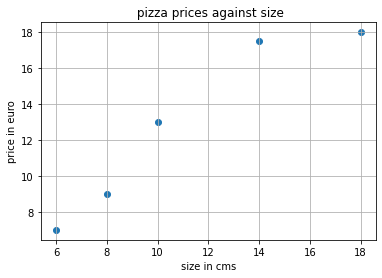

In [66]:
plt.scatter(X,y)
plt.title(' pizza prices against size')
plt.xlabel('size in cms')
plt.ylabel('price in euro')
plt.grid()

Un nuage de points des données de X et y en utilisant la bibliothèque Matplotlib.<br/>

plt.scatter(X, y) crée un nuage de points avec les valeurs de X sur l'axe des x et les valeurs de y sur l'axe des y.<br/>

plt.title('prix de la pizza en fonction de la taille') définit le titre du graphique comme 'prix de la pizza en fonction de la taille'.<br/>

plt.xlabel('taille en cms') définit l'étiquette pour l'axe des x comme 'taille en cms'.<br/>

plt.ylabel('prix en euro') définit l'étiquette pour l'axe des y comme 'prix en euro'.<br/>

plt.grid() ajoute une grille au graphique pour une meilleure lisibilité.

# Regression lineaire

In [68]:
reg = LinearRegression().fit(X,y)
test_x = np.linspace(0, 25, 100).reshape(-1, 1)
predicted_y = reg.predict(test_x)


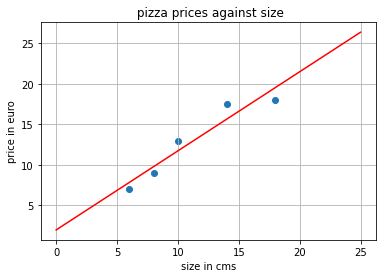

In [69]:
plt.scatter(X,y)
plt.plot(test_x,predicted_y,color = 'red')
plt.title(' pizza prices against size')
plt.xlabel('size in cms')
plt.ylabel('price in euro')
plt.grid()

# Evaluation du modèle

In [70]:
RSS = 0 
predicted_originals = reg.predict(X)
for i in range(len(X)) : 
    RSS += (y[i]-predicted_originals[i])**2
RSS

8.747844827586203

# Etude théorique de notre problème de pizza

In [71]:
var_x = 0
moy_x = np.mean(X)
n = len(X)
for i in range(n) :
    var_x += (X[i][0]- moy_x)**2
var_x = var_x/(n-1)
var_x


23.2

In [72]:
np.var(X, ddof=1)

23.2

In [73]:
cov_x_y = 0 
moy_y = np.mean(y)
for  i in range(n) :
    cov_x_y += (X[i][0]-moy_x)*(y[i]-moy_y)
cov_x_y = cov_x_y/(n-1)
cov_x_y

22.65

In [74]:
np.cov(X.transpose(), y)[0][1]

22.650000000000002

In [75]:
a = cov_x_y/var_x
a

0.9762931034482758

In [76]:
b = moy_y - a*moy_x
b

1.9655172413793114

In [77]:
X_test = np.array([[8], [9], [11], [16], [12]])
y_test = [11, 8.5, 15, 18, 11]

In [78]:
reg1 = LinearRegression().fit(X_test,y_test)

In [79]:
SS_tot = 0 
moy_test = np.mean(y_test)
for i in range( len(y_test)) :
    SS_tot += (y_test[i]-moy_test)**2
SS_tot

56.8

In [80]:
RSS_test = 0 
predicted_originals_test = reg1.predict(X_test)
for i in range(len(X_test)) : 
    RSS_test += (y_test[i]-predicted_originals_test[i])**2
RSS_test

18.993556701030926

In [82]:
R_squared = 1 - RSS_test/SS_tot
R_squared

0.6656063961086105

# Résumé
Dans ce sujet nous avons vu comment faire une régression linéaire en python à l’aide
de la librairie sklearn sur un problème élémentaire.
